# INFO 3350/6350

## Lecture 03: Feature standardization, normalization, and dimension reduction

## Normalization and standardization

First, note that the terms "normalization" and "standardization" are sometimes used interchangably or inconsistently. So be sure you understand what's going on in any given instance if you encounter there terms in the wild. In this class, we'll try to be consistent with the definitions below.

### Normalization (`l1`, `l2`)

* Normalization is the process by which we ensure that each vector in our feature matrix has the same length
    * Normalization works *row-wise*, not *column-wise*. That is, we normalize the features attached to each *observation*.
* The details vary, depending on our distance (length) metric
* The two most commonly used normalizations are `l1` and `l2`
* `l1` normalization adjusts the features so that they sum to one in each vector.
    * This means that the *Manhattan length* of each vector is one
    * It also means that the normalized value of each feature represents the fraction of the total feature counts/weight accounted for by that feature in a given document
    * `l1` norms preserve the original ratios between the features. This is often good for accuracy on downstream tasks.
* `l2` normalization adjusts each vector so that the sum of the squared features is one
    * This means that the *Euclidean length* of each vector is one
    * `l2` norms decrease the effective weight of low-frequency features (hence, they increase the relative weight of high-frequency features). This can be good for interpretation, because it means that downstream tasks rely on a comparatively sparse set of important features.


### Standardization (*z*-scores)

* Even when we normalize our vectors, distances and similarities are dominated by common terms
    * Common terms contribute most of the weight to the overall vector
    * This might be what we want ...
    * ... or it might not.
* What if we care about the comparative usage rates of each included feature (word)?
    * That is, what if every word should contribute equally?
    * We could scale between, say, 0 and 1
        * But then we're at the mercy of high and low outliers
    * Instead, we often scale to mean zero and standard deviation one.
        * This is called a "standard score" or "*z*-score."
* Standardization works *column-wise*. That is, it makes every *feature*, across all observations, as important as every other feature.

Typically, you'll normalize first, then scale. But some situations call for just one or the other, or are not especially sensitive to either one. You might *not* want to normalize or scale if your feature data share a common (and meaningful) scale and are already normally distributed. Leaving your data alone in that case may not make much difference for your task performance and may make it easier to interpret your results.

# An example

Consider the following example of normalization and standardization:

In [1]:
import pandas as pd
import numpy as np
from   sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
from   sklearn.metrics.pairwise import euclidean_distances, cosine_distances

# some invented data
sample = [
    [10,11,11,12],
    [0,0,1,1],
    [0,5,7,10]
]
df = pd.DataFrame(sample).T
df.columns = ['the', 'cat', 'she']

print('raw features:')
display(df)

raw features:


,the,cat,she
0,10,0,0
1,11,0,5
2,11,1,7
3,12,1,10


In [2]:
# mean and distances in raw invented data
print("raw mean:", round(np.mean(df.to_numpy()),2))
print('raw distances:')
display(pd.DataFrame(euclidean_distances(df)).mask(lambda x: x==0,np.nan).style.background_gradient(cmap='RdYlGn', axis=None))

raw mean: 5.67
raw distances:


,0,1,2,3
0,nan,5.099020,7.141428,10.246951
1,5.099020,nan,2.236068,5.196152
2,7.141428,2.236068,nan,3.162278
3,10.246951,5.196152,3.162278,nan


In [3]:
# examine effects of scaling and norming
print('\n\nmin-max scaling:')
minmax = MinMaxScaler().fit_transform(df)
display(minmax)
print("min-max mean:", round(np.mean(minmax),3))
print('min-max distances:')
display(pd.DataFrame(euclidean_distances(minmax)).mask(lambda x: x==0,np.nan).style.background_gradient(cmap='RdYlGn', axis=None))

print('\n\nz-scores:')
zscores = StandardScaler().fit_transform(df)
display(zscores)
print('z-score mean:', round(np.mean(zscores),3))
print('z-score distances:')
display(pd.DataFrame(euclidean_distances(zscores)).mask(lambda x: x==0,np.nan).style.background_gradient(cmap='RdYlGn', axis=None))

print('\n=====\nl1 norm:')
l1 = normalize(df, norm='l1')
display(l1)
print('l1 mean:', round(np.mean(l1),3))
print('l1 distances:')
display(pd.DataFrame(euclidean_distances(l1)).mask(lambda x: x==0,np.nan).style.background_gradient(cmap='RdYlGn', axis=None))

print('\n\nl2 norm:')
l2 = normalize(df, norm='l2')
display(l2)
print('l2 mean:', round(np.mean(l2),3))
print('l2 distances:')
display(pd.DataFrame(euclidean_distances(l2)).mask(lambda x: x==0,np.nan).style.background_gradient(cmap='RdYlGn', axis=None))

print('\n=====\nz-scored l2 norm:')
zl2 = StandardScaler().fit_transform(l2)
display(zl2)
print('z-scored l2 mean:', round(np.mean(zl2),3))
print('z-scored l2 distances:')
display(pd.DataFrame(euclidean_distances(zl2)).mask(lambda x: x==0,np.nan).style.background_gradient(cmap='RdYlGn', axis=None))



min-max scaling:


array([[0. , 0. , 0. ],
       [0.5, 0. , 0.5],
       [0.5, 1. , 0.7],
       [1. , 1. , 1. ]])

min-max mean: 0.517
min-max distances:


,0,1,2,3
0,nan,0.707107,1.319091,1.732051
1,0.707107,nan,1.019804,1.224745
2,1.319091,1.019804,nan,0.583095
3,1.732051,1.224745,0.583095,nan




z-scores:


array([[-1.41421356, -1.        , -1.5109662 ],
       [ 0.        , -1.        , -0.13736056],
       [ 0.        ,  1.        ,  0.41208169],
       [ 1.41421356,  1.        ,  1.23624508]])

z-score mean: 0.0
z-score distances:


,0,1,2,3
0,nan,1.971495,3.114179,4.421218
1,1.971495,nan,2.074099,2.808343
2,3.114179,2.074099,nan,1.636840
3,4.421218,2.808343,1.636840,nan



=====
l1 norm:


array([[1.        , 0.        , 0.        ],
       [0.6875    , 0.        , 0.3125    ],
       [0.57894737, 0.05263158, 0.36842105],
       [0.52173913, 0.04347826, 0.43478261]])

l1 mean: 0.333
l1 distances:


,0,1,2,3
0,nan,0.441942,0.561951,0.647811
1,0.441942,nan,0.132970,0.210523
2,0.561951,0.132970,nan,0.088093
3,0.647811,0.210523,0.088093,nan




l2 norm:


array([[1.        , 0.        , 0.        ],
       [0.91036648, 0.        , 0.41380294],
       [0.84119102, 0.07647191, 0.53530338],
       [0.76665188, 0.06388766, 0.63887656]])

l2 mean: 0.437
l2 distances:


,0,1,2,3
0,nan,0.423399,0.563576,0.683152
1,0.423399,nan,0.159360,0.274579
2,0.563576,0.159360,nan,0.128226
3,0.683152,0.274579,0.128226,nan



=====
z-scored l2 norm:


array([[ 1.39839904, -0.99205722, -1.63605823],
       [ 0.35775253, -0.99205722,  0.06926421],
       [-0.4453755 ,  1.16994749,  0.56997939],
       [-1.31077608,  0.81416695,  0.99681463]])

z-scored l2 mean: 0.0
z-scored l2 distances:


,0,1,2,3
0,nan,1.997766,3.597273,4.187373
1,1.997766,nan,2.360084,2.628076
2,3.597273,2.360084,nan,1.028439
3,4.187373,2.628076,1.028439,nan


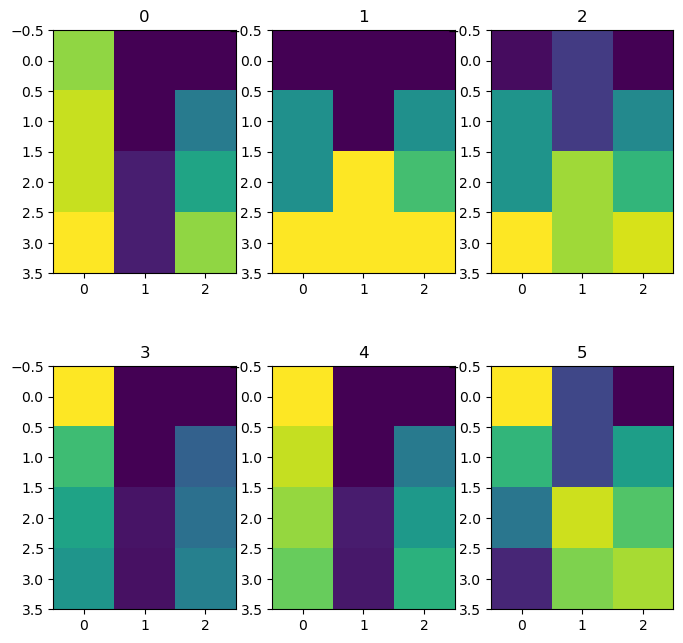

In [4]:
# a single plot with all six feature (not distance) matrices
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i, mat in enumerate([df, minmax, zscores, l1, l2, zl2]):
    plt.subplot(int(f'23{i+1}'))
    plt.imshow(mat)
    plt.title(i)
plt.show()  

Normalization is very common when working with text data. It performs something akin to document-length normalization. 

Standardization is also used, but note that it's often less useful, given the non-normal distribution of most word counts (especially beyond stopwords).

## Dimension reduction

### The curse of dimensionality

Textual data are prone to high dimensionality, at least when your features are token counts. The vocabulary of a language (and generally of a corpus of documents written in that language) is large. If every token type is a feature, it's easy to have 10,000+ features in even a smallish corpus.

High feature dimensionality relative to the number of observations (books or documents, for example) in your data leads to the "[curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality)."

* Low density of samples
    * Hard to identify "typical" or "average" points. 
    * Everything is an outlier.
    * All points are far apart (or have low similarity, or are uncorrelated).
* Multicolinearity
    * Always true when you have more dimensions than samples.
    * Many variables might be substituted for one another.
    * But *which ones*?
    * This is a problem if we want to *interpret* our model.
* Overfitting
    * Too much "detail" in our training data.
    * For example, say we care about cats in our texts.
        * Do we need features `['cat', 'cats', 'kitten', 'kittens', 'kitty', 'kitties', 'Cat', 'Cats', ...]`?
        * Probably not; any one of these, or their sum, would do.
        
#### High-dimensionality demo

Let's look at the distances between an arbitrary number of points in spaces of increasing dimensionality ...

Median distance (1000 points in 2 dimensions):  0.0887


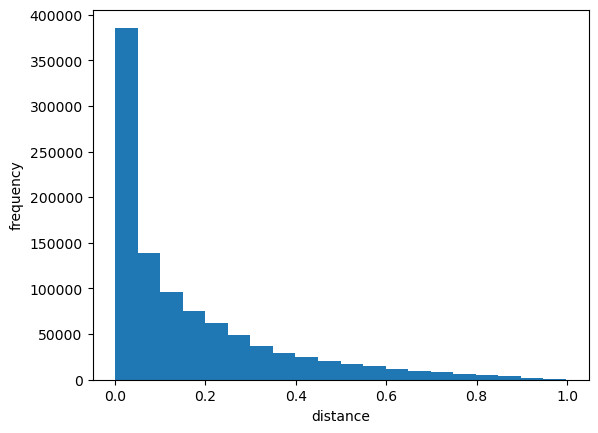

In [5]:
import numpy as np

def distance_distribution(dims=2, points=100, distance_function=euclidean_distances):
    '''Find median distance between points in n-dimensional space and
       plot histogram of all distances'''
    data = np.random.rand(points,dims)
    distances = distance_function(data)
    np.fill_diagonal(distances, np.nan)
    print(f"Median distance ({points} points in {dims} dimensions): {np.nanmedian(distances):7.4f}")
    plt.hist(np.ravel(distances), bins=20)
    plt.xlabel("distance")
    plt.ylabel("frequency")
    plt.show()
    
    return distances

#print(distance_distribution.toarray())
_ = distance_distribution(dims=2, points=1000, distance_function=cosine_distances)

Median distance (1000 points in 500 dimensions):  0.2497


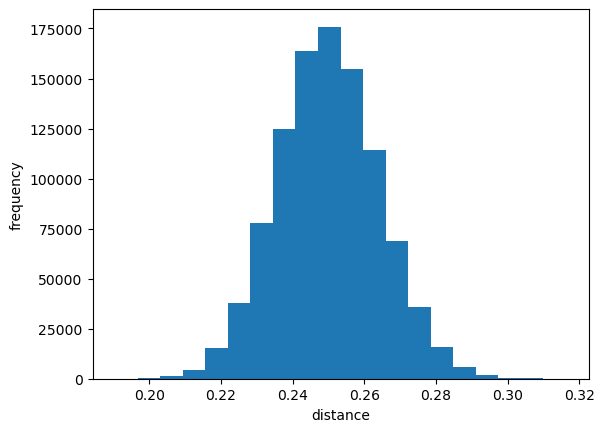

In [6]:
high_dim_distances = distance_distribution(dims=500, points=1000, distance_function=cosine_distances)

What do you notice about these distributions of distances?

In [7]:
# what angle corresponds to the median distance?
print(f"Median angle: {np.arccos(1-np.nanmedian(high_dim_distances))*180/np.pi:7.4f}")

Median angle: 41.3849


The trick, when faced with high-dimensional data, is to figure out *which* features to keep (feature selection) and/or how to collapse multiple features into one (dimension reduction).

## Feature selection

We'll talk more about this later, but for now, a few key points:

* If a feature has the same value for most objects (that is, it has low variance), it is unlikely to be informative and is a good candidate for elimination.
* We're looking to hold on to as much of the underlying variance (information) in the data as possible, while eliminating as many features as possible.
    * Any measure of correlation or mutual information would help us identify features that provide similar information.
    * We might then drop one or more of those variables with little loss of overall information.
* We can also work empirically and *post hoc* by calculating feature importances from our classifier (where possible).
    * We then retain only the *n* most important features and examine the impact on classifier performance.


## Dimension reduction: linear and manifold methods

But we can also *transform* our features, rather than just dropping some and retaining others.

Specifically, we can look for mathematical *combinations* of features that hold on to all or most of the underlying variance.

Consider:

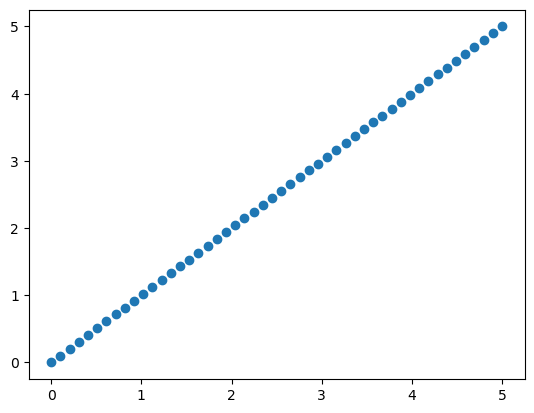

In [8]:
# linearly related variables
x = np.linspace(0,5)
y = x

plt.scatter(x,y)
plt.show()

* If we know *x*, we already know the *exact* value of *y*!
* Here, we could just drop *x* or *y*.

But what about this case?:

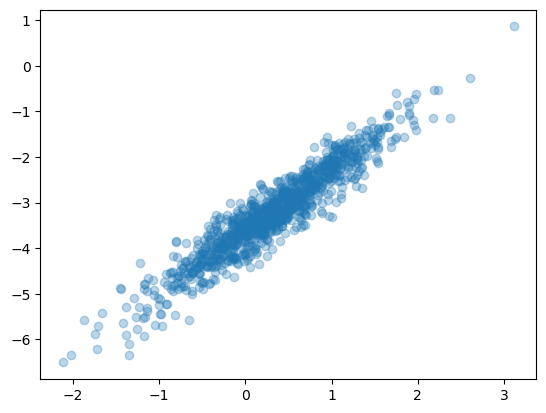

In [9]:
from sklearn.datasets import make_blobs

# NB. make_blobs creates synthetic data for demo purposes.
# You do not use make_blobs as part of a real analysis workflow.
X, y = make_blobs(n_samples=1000, centers=1)
transformation = [[-0.6, -0.6], [0.4, 0.8]]
X_aniso = np.dot(X, transformation)
plt.scatter(X_aniso[:,0], X_aniso[:,1], alpha=0.3);

### Principal component analysis (PCA)

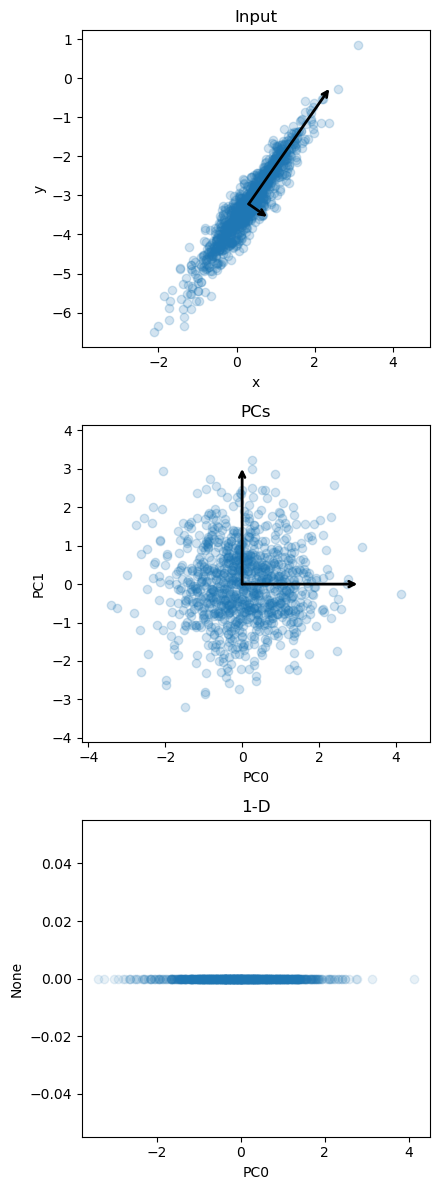

Explained variance: [0.97518868 0.02481132]
Component loadings:
 [[ 0.57340337  0.8192732 ]
 [ 0.8192732  -0.57340337]]


In [10]:
from sklearn.decomposition import PCA

# A function to draw vectors
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# Set up and fit PCA
pca = PCA(n_components=2, whiten=True) # whiten enforces some extra regularity on output
X_pca = pca.fit_transform(X_aniso)

# Plotting
fig, ax = plt.subplots(3,1, figsize=(4.5, 12))

# Input data
ax[0].scatter(X_aniso[:, 0], X_aniso[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='Input')

# PCA 2-D
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='PC0', ylabel='PC1',
          title='PCs')

# PCA 1-D
ax[2].scatter(X_pca[:,0], np.zeros(shape=len(X_aniso)), alpha=0.1)
ax[2].set(xlabel='PC0', ylabel='None', title='1-D')

plt.tight_layout()
plt.show()

print("Explained variance:", pca.explained_variance_ratio_)
print("Component loadings:\n", pca.components_)

### Truncated SVD

Singular Value Decomposition (SVD) is closely related to PCA. PCA is just SVD performed after z-scoring the input data. The only difference, from our perspective, is that, because PCA needs to standardize input data, it requires dense (rather than sparse) input (and produces dense output). So, we use SVD (via `TrunctedSVD`) when we want to preserve input sparsity (e.g., when our dataset is very large). "Truncated" just means that we retain fewer dimensions in our output than existed in the input.

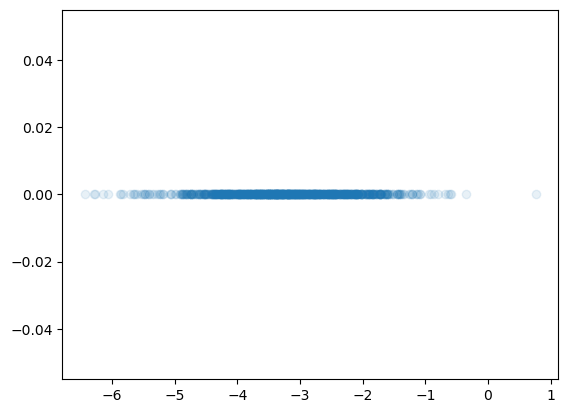

Explained variance: 0.6338
Explained variance using standardized data: 0.9722


In [11]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=1)
X = svd.fit_transform(X_aniso)
plt.scatter(X[:,0], np.zeros(shape=len(X)), alpha=0.1)
plt.show()
print('Explained variance:', round(svd.explained_variance_ratio_[0],4))
svd.fit_transform(StandardScaler().fit_transform(X_aniso))
print('Explained variance using standardized data:', round(svd.explained_variance_ratio_[0],4))

Notes:

* Standardizing our input data captures about the same amount of variance as does PCA. It's slightly different because we used the `whiten` option with PCA, which assures unit variance in each each reduced output dimension at the typical cost of a small amount of lost variance.
* We've used a one-dimensional plot here *not* because SVD is doing something different from PCA, but to show what dimension *reduction* looks like. We had 2-D inputs; it doesn't really make sense to use 2-D outputs!

### *t*-SNE

*t*-distributed Stochastic Neighbor Embedding is a *manifold* method. Features are projected into a multidimensional manifold rather than onto lines.

TSNE is (or was; see below) widely used for visualization, because it's good at maintaining internal structure ("lumpiness").

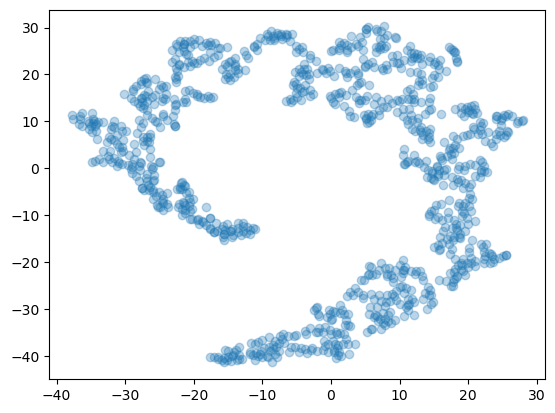

In [12]:
from sklearn.manifold import TSNE

tsne = TSNE(init='random', learning_rate='auto')
X = tsne.fit_transform(X_aniso)
plt.scatter(X[:,0], X[:,1], alpha=0.3);

### UMAP

Uniform Manifold Approximation and Projection (UMAP) is a manifold method, like *t*-SNE. It's more computationally efficient than *t*-SNE and tends to perform a bit better, too (in the sense that it preserves more of the underlying density structure). UMAP is generally preferred to *t*-SNE for visualization these days.

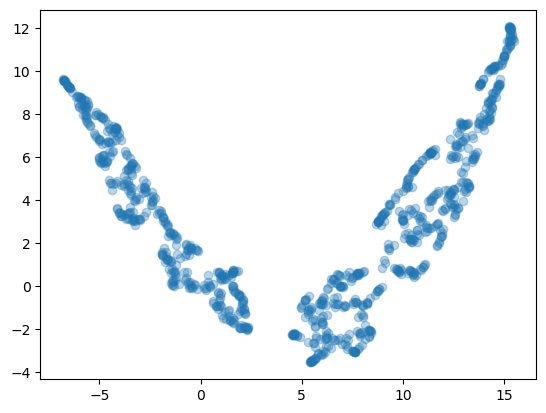

In [13]:
import umap

umap_reducer = umap.UMAP()
X = umap_reducer.fit_transform(X_aniso)
plt.scatter(X[:,0], X[:,1], alpha=0.3);

There are a bunch of parameters that control the performance of UMAP (and of *t*-SNE, too). If you make any real use of UMAP, you should read (and understand) [the documentation](https://umap-learn.readthedocs.io/en/latest/parameters.html#).